In [1]:
import tensorflow as tf

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
import numpy as np

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [6]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [7]:
from keras import regularizers
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

In [8]:
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
                                       
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 43ms/step - loss: 2.2727 - accuracy: 0.4951 - val_loss: 1.4539 - val_accuracy: 0.6590
Epoch 2/20
16/16 [==============================] - 1s 32ms/step - loss: 1.4034 - accuracy: 0.6787 - val_loss: 1.2167 - val_accuracy: 0.7190
Epoch 3/20
16/16 [==============================] - 1s 33ms/step - loss: 1.1494 - accuracy: 0.7325 - val_loss: 1.0918 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 1s 33ms/step - loss: 0.9671 - accuracy: 0.7730 - val_loss: 1.0156 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 1s 33ms/step - loss: 0.8344 - accuracy: 0.8056 - val_loss: 0.9435 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 33ms/step - loss: 0.7179 - accuracy: 0.8274 - val_loss: 0.9211 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 1s 32ms/step - loss: 0.6126 - accuracy: 0.8534 - val_loss: 0.8650 - val_accuracy: 0.8220
Epoch 8/20
16

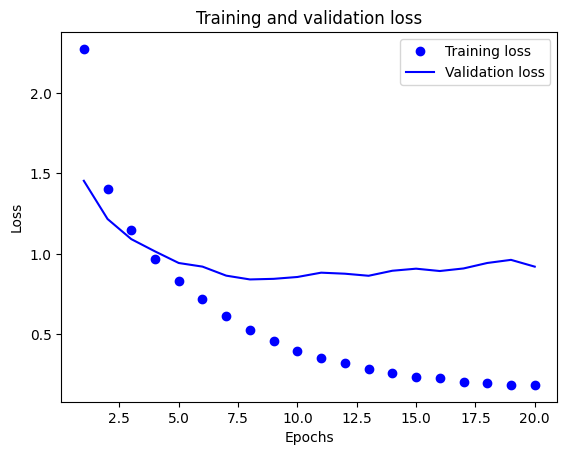

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

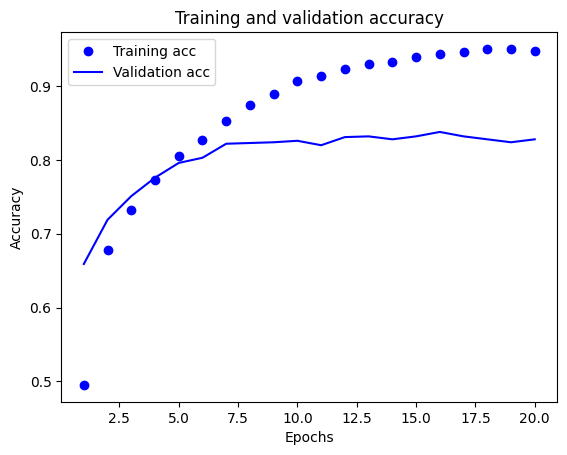

In [11]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()